In [4]:
import os, csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 老化指數

In [8]:
data_dir = './'
csv_name = '107_12_people.csv'

f_csv = os.path.join(data_dir, csv_name)
csv_data = pd.read_csv(f_csv, header=0, skiprows=1)

In [11]:
csv_data.head(10)

,二級發布區代碼,一級發布區代碼,最小統計區代碼,性比例,戶量,人口密度,扶養比,扶幼比,扶老比,老化指數,資料時間
0,Dec-31,A6401-01-001,A6401-0002-00,87.21,2.37,23440.87,41.23,5.26,35.96,683.33,107Y12M
1,Dec-31,A6401-01-001,A6401-0004-00,80.65,2.80,26216.02,24.44,4.44,20.00,450.00,107Y12M
2,Dec-31,A6401-01-002,A6401-0005-00,97.72,2.54,66191.04,34.59,17.74,16.85,95.00,107Y12M
3,Dec-31,A6401-01-003,A6401-0006-00,89.94,2.17,34971.63,31.30,12.17,19.13,157.14,107Y12M
4,Dec-31,A6401-01-004,A6401-0008-00,70.97,2.52,5558.79,51.43,14.29,37.14,260.00,107Y12M
5,Dec-31,A6401-01-004,A6401-0009-00,109.65,2.34,21998.94,42.26,11.90,30.36,255.00,107Y12M
6,Dec-31,A6401-01-004,A6401-0012-00,92.59,2.54,14857.13,44.44,11.11,33.33,300.00,107Y12M
7,Dec-31,A6401-01-005,A6401-0010-00,100.00,2.36,13703.31,66.20,18.31,47.89,261.54,107Y12M
8,Dec-31,A6401-01-005,A6401-0011-00,115.34,1.52,51692.13,45.77,10.00,35.77,357.69,107Y12M
9,Dec-31,A6401-01-006,A6401-0014-00,103.54,2.37,24779.8,41.98,11.73,30.25,257.89,107Y12M


count    15622.000000
mean       182.531346
std        217.321449
min          0.000000
25%         66.670000
50%        133.330000
75%        230.000000
max       6800.000000
Name: 老化指數, dtype: float64


(array([1.5208e+04, 3.4500e+02, 4.7000e+01, 1.5000e+01, 3.0000e+00,
        2.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([   0.,  680., 1360., 2040., 2720., 3400., 4080., 4760., 5440.,
        6120., 6800.]),
 <a list of 10 Patch objects>)

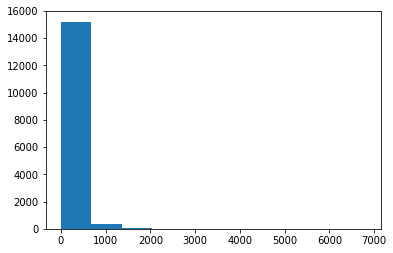

In [17]:
old_point = csv_data['老化指數']
# old_point = old_point[old_point < 1000]
# old_point = np.log(old_point)
print(old_point.describe())
plt.hist(old_point)

In [24]:
code = 'A6402-0575-00'
print(csv_data[csv_data['最小統計區代碼'] == code]['老化指數'])
csv_data[csv_data['最小統計區代碼'] == code]

672    162.5
Name: 老化指數, dtype: float64


,二級發布區代碼,一級發布區代碼,最小統計區代碼,性比例,戶量,人口密度,扶養比,扶幼比,扶老比,老化指數,資料時間
672,A6402-54,A6402-54-005,A6402-0575-00,99.29,2.27,12544.27,28.9,11.01,17.89,162.5,107Y12M


### 醫療院所統計

In [28]:
data_dir = './'
csv_name = '107年12月高雄市統計區醫療院所統計_最小統計區.csv'

f_csv = os.path.join(data_dir, csv_name)
csv_data = pd.read_csv(f_csv, header=0, skiprows=1)

In [29]:
csv_data.head()

,二級發布區代碼,一級發布區代碼,最小統計區代碼,醫療院所家數,醫療院所床數,醫療院所平均每家服務人數,醫療院所平均每千人擁有病床數,資料時間
0,A6401-01,A6401-01-001,A6401-0002-00,1,0,161.0,0.0,107Y12M
1,A6401-01,A6401-01-001,A6401-0004-00,0,0,0.0,0.0,107Y12M
2,A6401-01,A6401-01-002,A6401-0005-00,0,0,0.0,0.0,107Y12M
3,A6401-01,A6401-01-003,A6401-0006-00,0,0,0.0,0.0,107Y12M
4,A6401-01,A6401-01-004,A6401-0008-00,0,0,0.0,0.0,107Y12M


In [31]:
csv_data['醫療院所家數'].value_counts()

0    15338
1     1424
2      415
3      134
4       43
5       23
6        6
8        2
9        1
7        1
Name: 醫療院所家數, dtype: int64

In [43]:
sum_hospital = csv_data.groupby('一級發布區代碼').sum()
sum_hospital['醫療院所家數'].value_counts()
# plt.hist(sum_hospital['醫療院所家數'])

0     6561
1     1128
2      431
3      144
4       64
5       31
6       10
7        7
8        5
9        2
11       1
Name: 醫療院所家數, dtype: int64